# Welcome:

In this notebook we are going to try to extract vibradtions due to mechanical motion of heart by using some filtering techniques. 

### Imports:

In [1]:
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import obspy

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

After you have downloaded your dataset you should change the **dir_path** to the path of your directory which contains your data. You can download your data from data section. The dataset we will use is named diseased dataset. You can directly use .npy files that ı have extracted for you.

In [2]:
dir_path = "/Users/ecem/Documents/GitHub/seismocardiogram/data/diseased-dataset/Raw_Recordings"

In [3]:
x = np.load(dir_path + "/SCG_x.npy", allow_pickle= True)
y = np.load(dir_path + "/SCG_z.npy", allow_pickle= True)
z = np.load(dir_path + "/SCG_y.npy", allow_pickle= True)

In [4]:
x[0].shape

(120774,)

#### lets check the  plots of the x, y, z components of the waveform that we are going to work on this notebook.

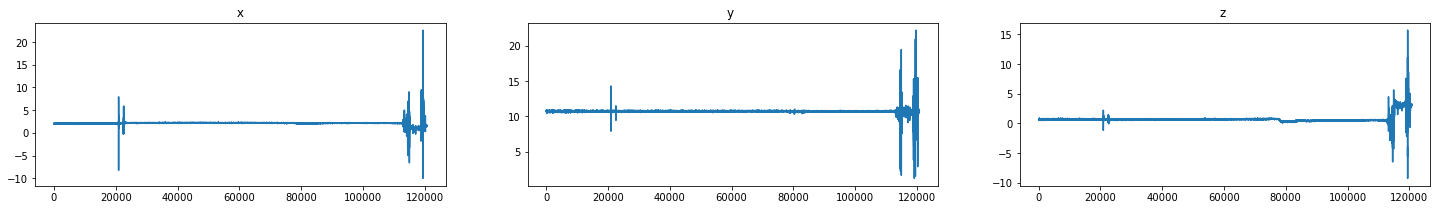

In [5]:
fig = plt.figure(figsize=(25, 3))
rows = 1
columns = 3 

fig.add_subplot(rows, columns, 1)
plt.plot(x[0])
plt.title(" x ")

fig.add_subplot(rows, columns, 2 )
plt.plot(y[0])
plt.title("y ")

fig.add_subplot(rows, columns, 3)
plt.plot(z[0])
plt.title("z ")

plt.show()

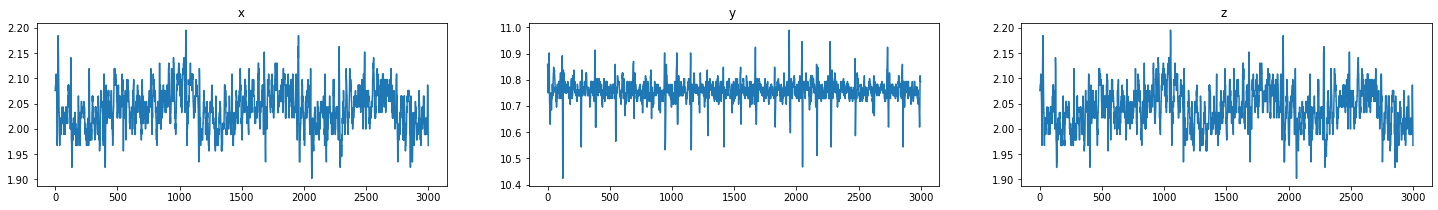

In [6]:
fig = plt.figure(figsize=(25, 3))
rows = 1
columns = 3 

fig.add_subplot(rows, columns, 1)
plt.plot(x[0][0:3000])
plt.title(" x ")

fig.add_subplot(rows, columns, 2 )
plt.plot(y[0][0:3000])
plt.title("y ")

fig.add_subplot(rows, columns, 3)
plt.plot(x[0][0:3000])
plt.title("z ")

plt.show()

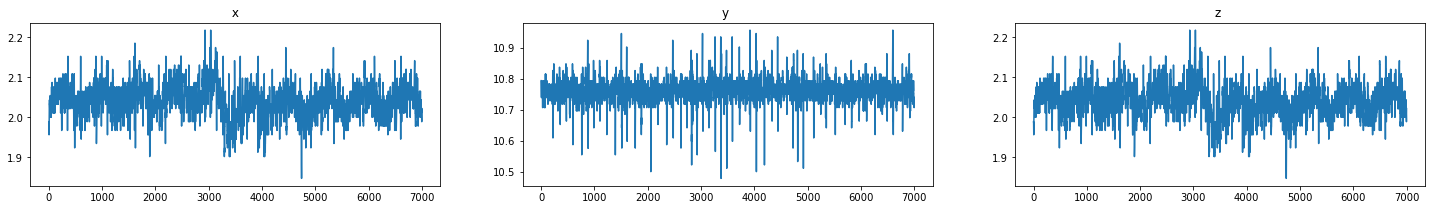

In [7]:
fig = plt.figure(figsize=(25, 3))
rows = 1
columns = 3 

fig.add_subplot(rows, columns, 1)
plt.plot(x[0][3000:10000])
plt.title(" x ")

fig.add_subplot(rows, columns, 2 )
plt.plot(y[0][3000:10000])
plt.title("y ")

fig.add_subplot(rows, columns, 3)
plt.plot(x[0][3000:10000])
plt.title("z ")

plt.show()

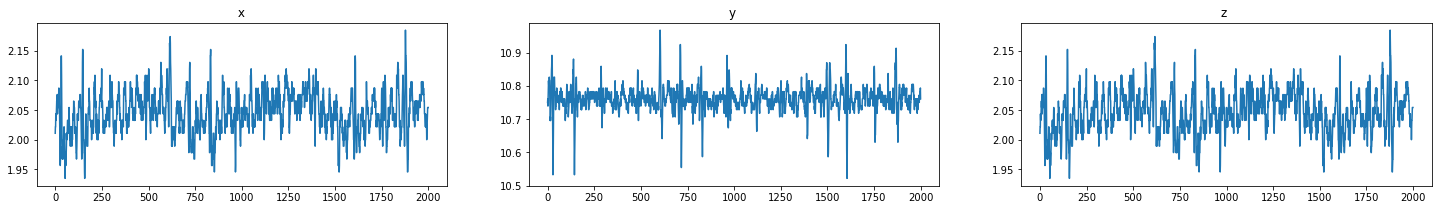

In [8]:
fig = plt.figure(figsize=(25, 3))
rows = 1
columns = 3 

fig.add_subplot(rows, columns, 1)
plt.plot(x[0][10000:12000])
plt.title(" x ")

fig.add_subplot(rows, columns, 2 )
plt.plot(y[0][10000:12000])
plt.title("y ")

fig.add_subplot(rows, columns, 3)
plt.plot(x[0][10000:12000])
plt.title("z ")

plt.show()

## seismology library  techniques on specific scg signal

### create trace object

In [9]:
tr_x = obspy.core.trace.Trace(x[0]).detrend("linear").taper(max_percentage=0.05, type="hann")
tr_y = obspy.core.trace.Trace(y[0]).detrend("linear").taper(max_percentage=0.05, type="hann")
tr_z = obspy.core.trace.Trace(z[0]).detrend("linear").taper(max_percentage=0.05, type="hann")

In [10]:
tr_x_sliced = obspy.core.trace.Trace(x[0][10000:12000]).detrend("linear").taper(max_percentage=0.05, type="hann")
tr_y_sliced = obspy.core.trace.Trace(y[0][10000:12000]).detrend("linear").taper(max_percentage=0.05, type="hann")
tr_z_sliced = obspy.core.trace.Trace(z[0][10000:12000]).detrend("linear").taper(max_percentage=0.05, type="hann")

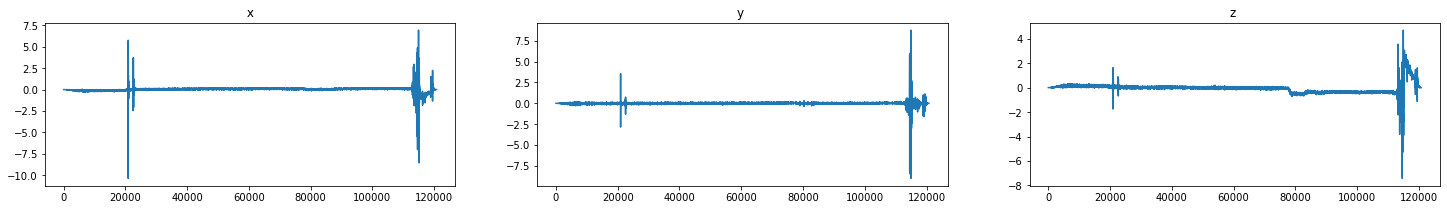

In [11]:
fig = plt.figure(figsize=(25, 3))
rows = 1
columns = 3 

fig.add_subplot(rows, columns, 1)
plt.plot(tr_x)
plt.title(" x ")

fig.add_subplot(rows, columns, 2 )
plt.plot(tr_y)
plt.title("y ")

fig.add_subplot(rows, columns, 3)
plt.plot(tr_z)
plt.title("z ")

plt.show()

#### compare trace and original signal

Now since we convert our data from numpy array to obspy trace object we need to be sure that signal remained the same after the conversion. 

To check that we are going to use np.correlate. It outputs the cross-correlation of two 1-dimensional sequences.

In [12]:
tr_x.data.shape

(120774,)

In [13]:
x_x = x[0].astype(np.float)
tr_x_data = tr_x.data.astype(np.float)

In [14]:
r = np.correlate(x_x, tr_x, mode='full')
print(x_x.shape, tr_x.data.shape)

(120774,) (120774,)


This will return a comb function with a maximum when both data sets are overlapping. As this is an autocorrelation there will be no "lag" between the two input signals. The maximum of the correlation is therefore vector.size-1.

In [15]:
np.argmax(r)

120773

#### stats of trace object

In [16]:
tr_x.stats

         network: 
         station: 
        location: 
         channel: 
       starttime: 1970-01-01T00:00:00.000000Z
         endtime: 1970-01-02T09:32:53.000000Z
   sampling_rate: 1.0
           delta: 1.0
            npts: 120774
           calib: 1.0
      processing: ["ObsPy 1.3.0: detrend(options={}::type='linear')", "ObsPy 1.3.0: taper(max_length=None::max_percentage=0.05::side='both'::type='hann')"]

In [17]:
tr_x.stats.sampling_rate = 256
tr_y.stats.sampling_rate = 256
tr_z.stats.sampling_rate = 256

In [18]:
tr_x_sliced.stats.sampling_rate = 256
tr_y_sliced.stats.sampling_rate = 256
tr_z_sliced.stats.sampling_rate = 256

## Filtering

Now we will try different filtering tecniques.

### with scipy

In [19]:
import scipy

In [20]:
type(x[0][0])

numpy.float64

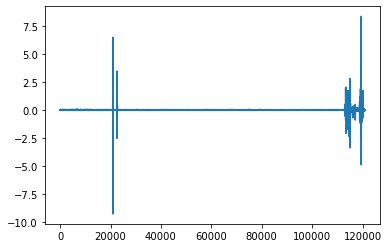

In [21]:
times = np.arange(len((x[0])))


b, a = scipy.signal.butter(3, 0.2, 'highpass')
filtered = scipy.signal.filtfilt((b), (a), (x[0]))
plt.plot(times, filtered)

In [22]:
b, a = scipy.signal.butter(2, 20, 'lowpass', fs = 256)
filteredLowPass = scipy.signal.filtfilt(b, a, x[0])

b, a = scipy.signal.butter(2, 6, 'highpass', fs = 256)
filteredHighPass = scipy.signal.filtfilt(b, a, y[0])

b, a = scipy.signal.butter(2, [6, 20], 'bandpass', fs = 256)
filteredBandPass = scipy.signal.lfilter(b, a, z[0])

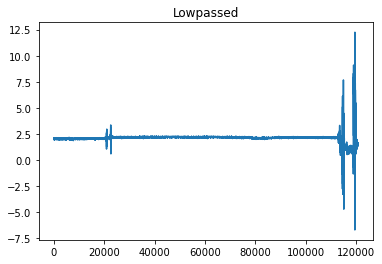

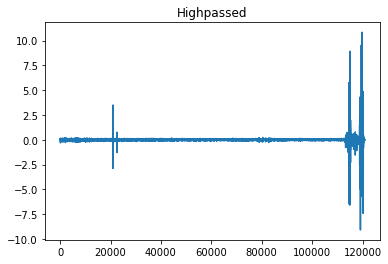

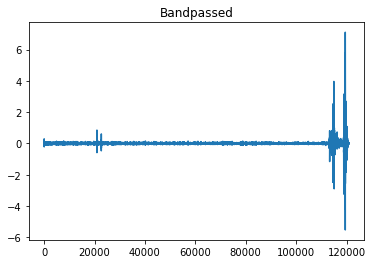

In [23]:
plt.plot(times, filteredLowPass)
plt.title("Lowpassed")
plt.show()
plt.plot(times, filteredHighPass)
plt.title("Highpassed")
plt.show()
plt.plot(times, filteredBandPass)
plt.title("Bandpassed")
plt.show()

### with obpsy

#### highpassed:

It is a filter that passes signals with a frequency higher than a certain cutoff frequency and attenuates 
signals with frequencies lower than the cutoff frequency.

In [24]:
highpassed_x = tr_x.copy().filter("highpass", freq = 6, corners = 2, zerophase = True)
highpassed_y = tr_y.copy().filter("highpass", freq = 6, corners = 2, zerophase = True)
highpassed_z = tr_z.copy().filter("highpass", freq = 6, corners = 2, zerophase = True)

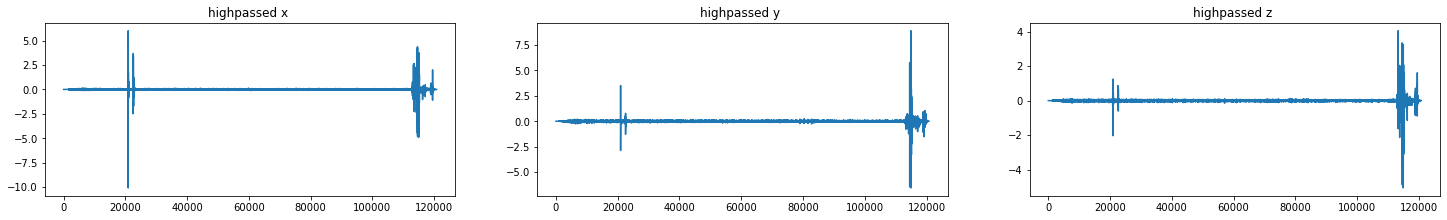

In [25]:
fig = plt.figure(figsize=(25, 7))
rows = 2
columns = 3

fig.add_subplot(rows, columns, 1)
plt.plot(highpassed_x)
plt.title("highpassed x ")

fig.add_subplot(rows, columns, 2 )
plt.plot(highpassed_y)
plt.title("highpassed y ")

fig.add_subplot(rows, columns, 3)
plt.plot(highpassed_z)
plt.title("highpassed z ")
plt.show()


#### sliced highpass

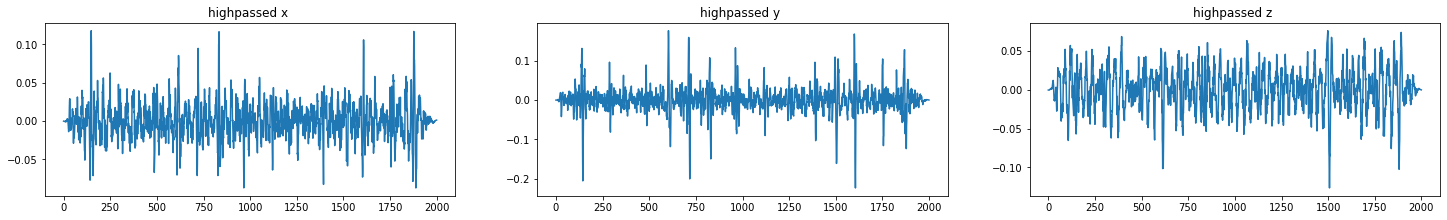

In [26]:
highpassed_x_s = tr_x_sliced.copy().filter("highpass", freq = 6, corners = 2, zerophase = True)
highpassed_y_s = tr_y_sliced.copy().filter("highpass", freq = 6, corners = 2, zerophase = True)
highpassed_z_s = tr_z_sliced.copy().filter("highpass", freq = 6, corners = 2, zerophase = True)

fig = plt.figure(figsize=(25, 7))
rows = 2
columns = 3

fig.add_subplot(rows, columns, 1)
plt.plot(highpassed_x_s)
plt.title("highpassed x ")

fig.add_subplot(rows, columns, 2 )
plt.plot(highpassed_y_s)
plt.title("highpassed y ")

fig.add_subplot(rows, columns, 3)
plt.plot(highpassed_z_s)
plt.title("highpassed z ")
plt.show()

### 

#### bandpassed:
bandpass filter (BPF) is a filter that passes frequencies within a certain range and rejects frequencies outside that range.


In [27]:
bandpassed_x = tr_x.copy().filter("bandpass", freqmin = 6, freqmax = 20, corners = 2, zerophase = True)
bandpassed_y = tr_y.copy().filter("bandpass", freqmin = 6, freqmax = 20, corners = 2, zerophase = True)
bandpassed_z = tr_z.copy().filter("bandpass", freqmin = 6, freqmax = 20, corners = 2, zerophase = True)

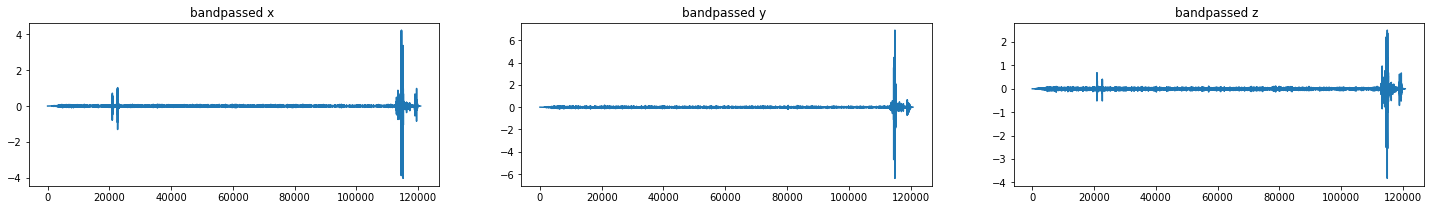

In [28]:
fig = plt.figure(figsize=(25, 3))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.plot(bandpassed_x)
plt.title("bandpassed x ")

fig.add_subplot(rows, columns, 2 )
plt.plot(bandpassed_y)
plt.title("bandpassed y ")

fig.add_subplot(rows, columns, 3)
plt.plot(bandpassed_z)
plt.title("bandpassed z ")
plt.show()

#### sliced bandpassed

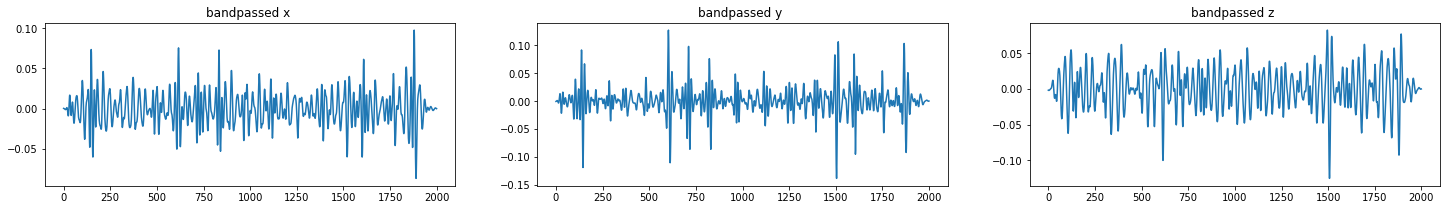

In [29]:
bandpassed_x_s = tr_x_sliced.copy().filter("bandpass", freqmin = 6, freqmax = 20, corners = 2, zerophase = True)
bandpassed_y_s = tr_y_sliced.copy().filter("bandpass", freqmin = 6, freqmax = 20, corners = 2, zerophase = True)
bandpassed_z_s = tr_z_sliced.copy().filter("bandpass", freqmin = 6, freqmax = 20, corners = 2, zerophase = True)

fig = plt.figure(figsize=(25, 3))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.plot(bandpassed_x_s)
plt.title("bandpassed x ")

fig.add_subplot(rows, columns, 2 )
plt.plot(bandpassed_y_s)
plt.title("bandpassed y ")

fig.add_subplot(rows, columns, 3)
plt.plot(bandpassed_z_s)
plt.title("bandpassed z ")
plt.show()

#### lowpassed:
low-pass filter is a filter that passes signals with a frequency lower than a selected cutoff frequency and attenuates signals with frequencies higher than the cutoff frequency.

In [30]:
lowpassed_x = tr_x.copy().filter("lowpass", freq = 20, corners = 2, zerophase = True)
lowpassed_y = tr_y.copy().filter("lowpass", freq = 20, corners = 2, zerophase = True)
lowpassed_z = tr_z.copy().filter("lowpass", freq = 20, corners = 2, zerophase = True)

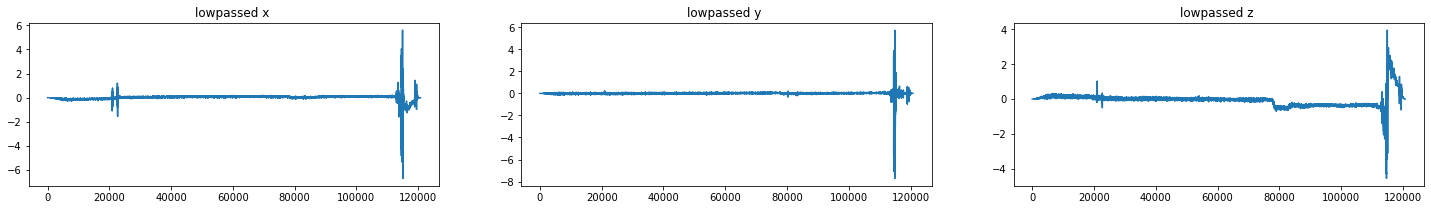

In [31]:
fig = plt.figure(figsize=(25, 3))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.plot(lowpassed_x)
plt.title("lowpassed x ")

fig.add_subplot(rows, columns, 2 )
plt.plot(lowpassed_y)
plt.title("lowpassed y ")

fig.add_subplot(rows, columns, 3)
plt.plot(lowpassed_z)
plt.title("lowpassed z ")
plt.show()

#### sliced lowpass

In [32]:
lowpassed_x_s = tr_x_sliced.copy().filter("lowpass", freq = 20, corners = 2, zerophase = True)
lowpassed_y_s = tr_y_sliced.copy().filter("lowpass", freq = 20, corners = 2, zerophase = True)
lowpassed_z_s = tr_z_sliced.copy().filter("lowpass", freq = 20, corners = 2, zerophase = True)

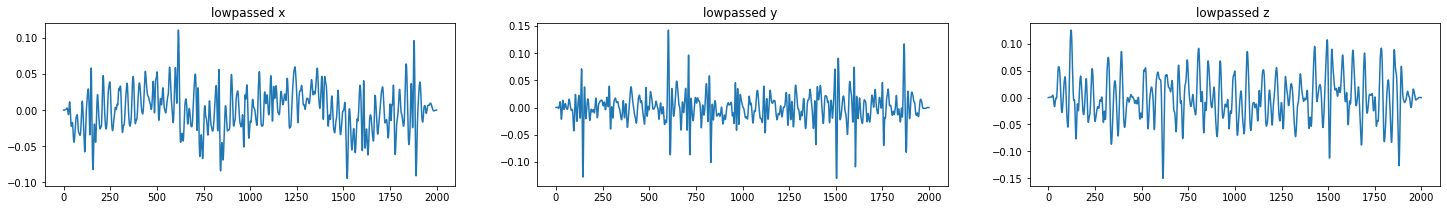

In [33]:
fig = plt.figure(figsize=(25, 3))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.plot(lowpassed_x_s)
plt.title("lowpassed x ")

fig.add_subplot(rows, columns, 2 )
plt.plot(lowpassed_y_s)
plt.title("lowpassed y ")

fig.add_subplot(rows, columns, 3)
plt.plot(lowpassed_z_s)
plt.title("lowpassed z ")
plt.show()

### with hearthpy

In [34]:
import heartpy as hp

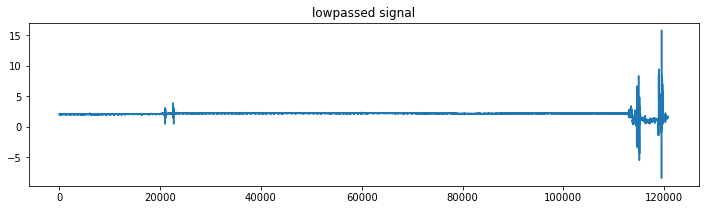

In [35]:
lowpassed = hp.filter_signal(x[0], cutoff = 30, sample_rate = 256, filtertype='lowpass' )
plt.figure(figsize=(12,3))
plt.title('lowpassed signal')
plt.plot(lowpassed)
plt.show()

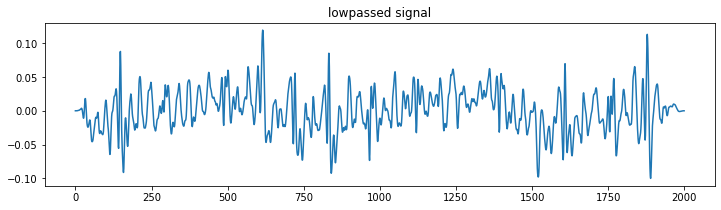

In [36]:
lowpassed_sliced = hp.filter_signal(tr_x_sliced.data, cutoff = 30, sample_rate = 256, filtertype='lowpass' )
plt.figure(figsize=(12,3))
plt.title('lowpassed signal')
plt.plot(lowpassed_sliced)
plt.show()

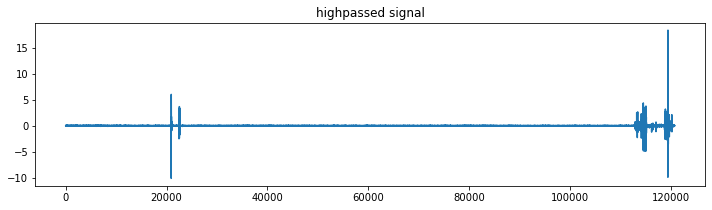

In [37]:
highpassed = hp.filter_signal(x[0], cutoff = 6.0, sample_rate = 256, filtertype='highpass' )
plt.figure(figsize=(12,3))
plt.title('highpassed signal')
plt.plot(highpassed)
plt.show()

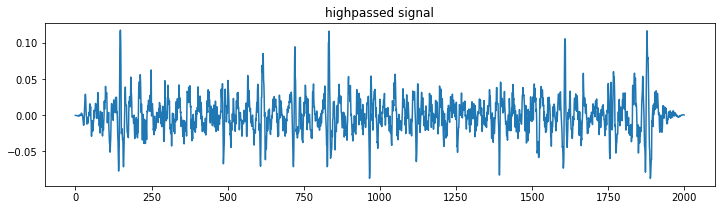

In [38]:
highpassed_sliced = hp.filter_signal(tr_x_sliced.data, cutoff = 6, sample_rate = 256, filtertype='highpass' )
plt.figure(figsize=(12,3))
plt.title('highpassed signal')
plt.plot(highpassed_sliced)
plt.show()

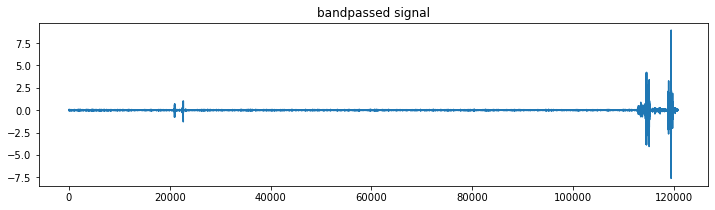

In [39]:
bandpassed = hp.filter_signal(x[0], cutoff = [6.0,20], sample_rate = 256, filtertype='bandpass' )
plt.figure(figsize=(12,3))
plt.title('bandpassed signal')
plt.plot(bandpassed)
plt.show()

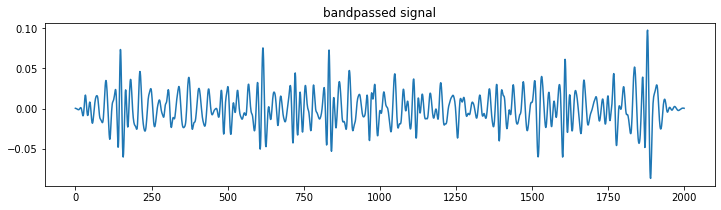

In [40]:
bandpassed_sliced = hp.filter_signal(tr_x_sliced.data, cutoff = [6.0,20], sample_rate = 256, filtertype='bandpass' )
plt.figure(figsize=(12,3))
plt.title('bandpassed signal')
plt.plot(bandpassed_sliced)
plt.show()

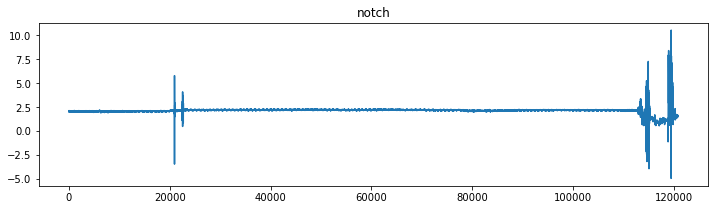

In [41]:
notch = hp.filter_signal(x[0], cutoff = 40, sample_rate = 256, filtertype='notch')
plt.figure(figsize=(12,3))
plt.title('notch')
plt.plot(notch)
plt.show()

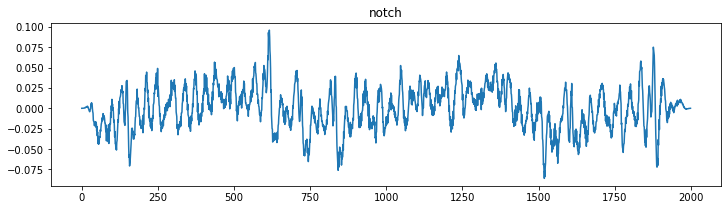

In [42]:
notch_sliced = hp.filter_signal(tr_x_sliced, cutoff = 40, sample_rate = 256, filtertype='notch')
plt.figure(figsize=(12,3))
plt.title('notch')
plt.plot(notch_sliced)
plt.show()

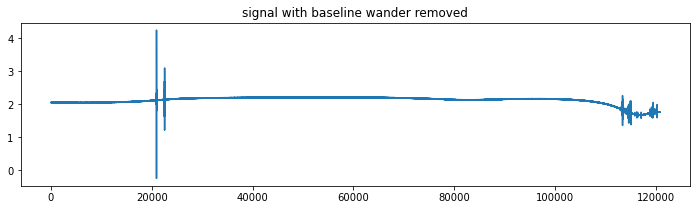

In [43]:
filtered = hp.remove_baseline_wander(x[0], 7)
plt.figure(figsize=(12,3))
plt.title('signal with baseline wander removed')
plt.plot(filtered)
plt.show()


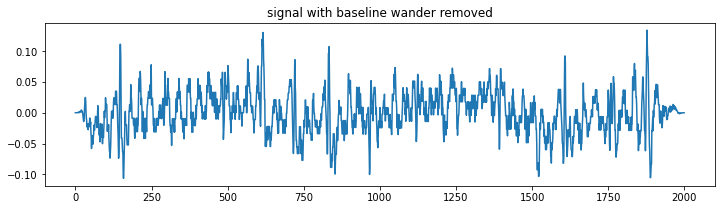

In [44]:
filtered_sliced = hp.remove_baseline_wander(tr_x_sliced.data, 10)
plt.figure(figsize=(12,3))
plt.title('signal with baseline wander removed')
plt.plot(filtered_sliced)
plt.show()



#### why is there a such difference ?

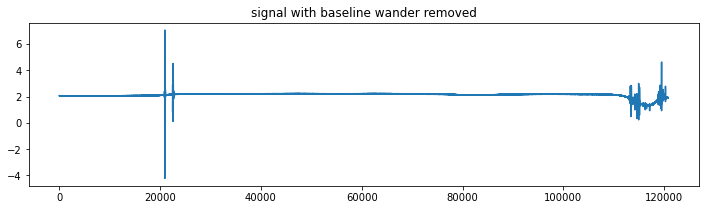

In [45]:
filtered = hp.remove_baseline_wander(x[0], 8)
plt.figure(figsize=(12,3))
plt.title('signal with baseline wander removed')
plt.plot(filtered)
plt.show()



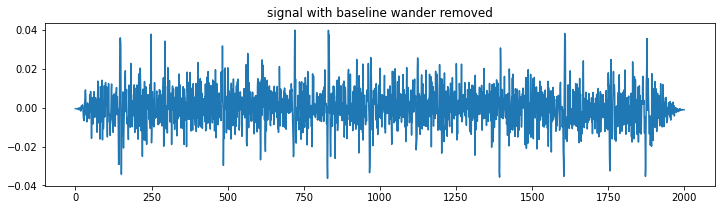

In [46]:
filtered_sliced = hp.remove_baseline_wander(tr_x_sliced.data, 9)
plt.figure(figsize=(12,3))
plt.title('signal with baseline wander removed')
plt.plot(filtered_sliced)
plt.show()

**outliers detection based on hampel filter**

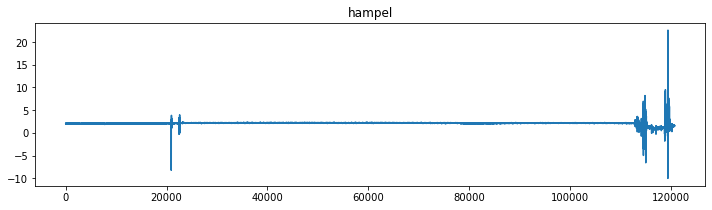

In [47]:
hampel = hp.hampel_filter(x[0], filtsize = 7)
plt.figure(figsize=(12,3))
plt.title('hampel')
plt.plot(hampel)
plt.show()



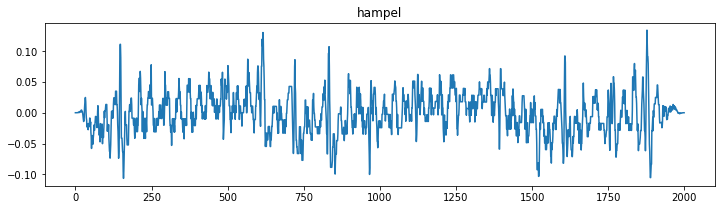

In [48]:
hampel_sliced = hp.hampel_filter(tr_x_sliced.data, filtsize = 7)
plt.figure(figsize=(12,3))
plt.title('hampel')
plt.plot(hampel_sliced)
plt.show()

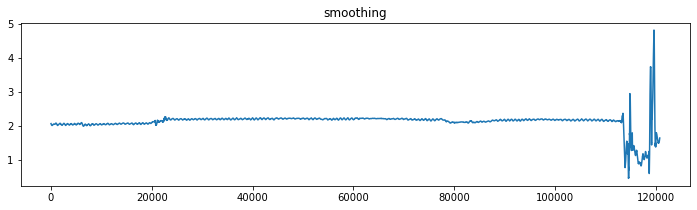

In [49]:
smoothed = hp.smooth_signal(x[0], sample_rate = 2, window_length=500, polyorder=3)
plt.figure(figsize=(12,3))
plt.title('smoothing')
plt.plot(smoothed)
plt.show()


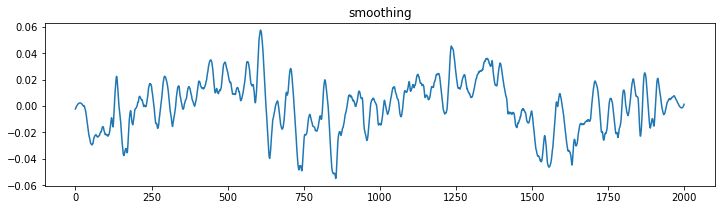

In [50]:
smoothed_sliced = hp.smooth_signal(tr_x_sliced.data, sample_rate = 2, window_length=50, polyorder=3)
plt.figure(figsize=(12,3))
plt.title('smoothing')
plt.plot(smoothed_sliced)
plt.show()

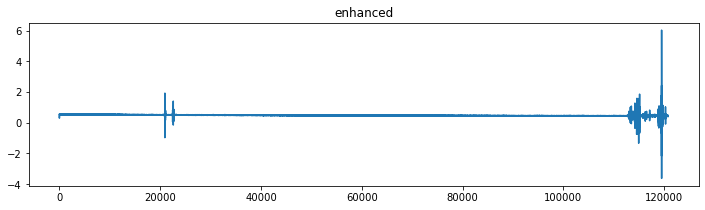

In [51]:
enhanced = hp.enhance_ecg_peaks(x[0], 256, iterations = 3)
plt.figure(figsize=(12,3))
plt.title('enhanced')
plt.plot(enhanced)
plt.show()

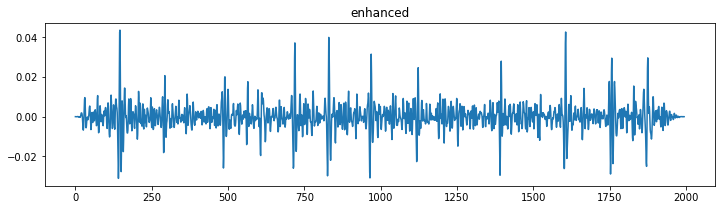

In [52]:
enhanced_sliced = hp.enhance_ecg_peaks(tr_x_sliced.data, 256, iterations = 3)
plt.figure(figsize=(12,3))
plt.title('enhanced')
plt.plot(enhanced_sliced)
plt.show()